In [2]:
import os
import re
import glob
import numpy
import matplotlib
import matplotlib.pyplot as plt
import pickle
import pandas as pd
%matplotlib inline
matplotlib.rcParams.update({'axes.linewidth': 0.25,
                            'xtick.major.size': 2,
                            'xtick.major.width': 0.25,
                            'ytick.major.size': 2,
                            'ytick.major.width': 0.25,
                            'pdf.fonttype': 42,
                            'font.sans-serif': 'Arial'})

In [3]:
# Load Lambda pmean df
path = '../../smomics_data'

# Read file
filename = os.path.join(path, 'lambdas_pmeans_spleen_exons_mRNA_6tags.tsv')

#Read file
#filename = os.path.join(path, 'lambdas_pmeans_spleen_exons_mRNA_ifs.tsv')
 
lambda_posterior_means = pd.read_csv(filename, index_col=0, sep='\t', header=[0,1])

# Take exp()
lambda_posterior_means = lambda_posterior_means.astype(float)
lambda_posterior_means = numpy.exp(lambda_posterior_means-1)

#clean up names
nwe=[]
nm=lambda_posterior_means.index
for item in nm:
    nwe.append(str(item).split("_")[0])
lambda_posterior_means.index = nwe

# Plot individual sections

In [10]:
gene = 'Cd4'

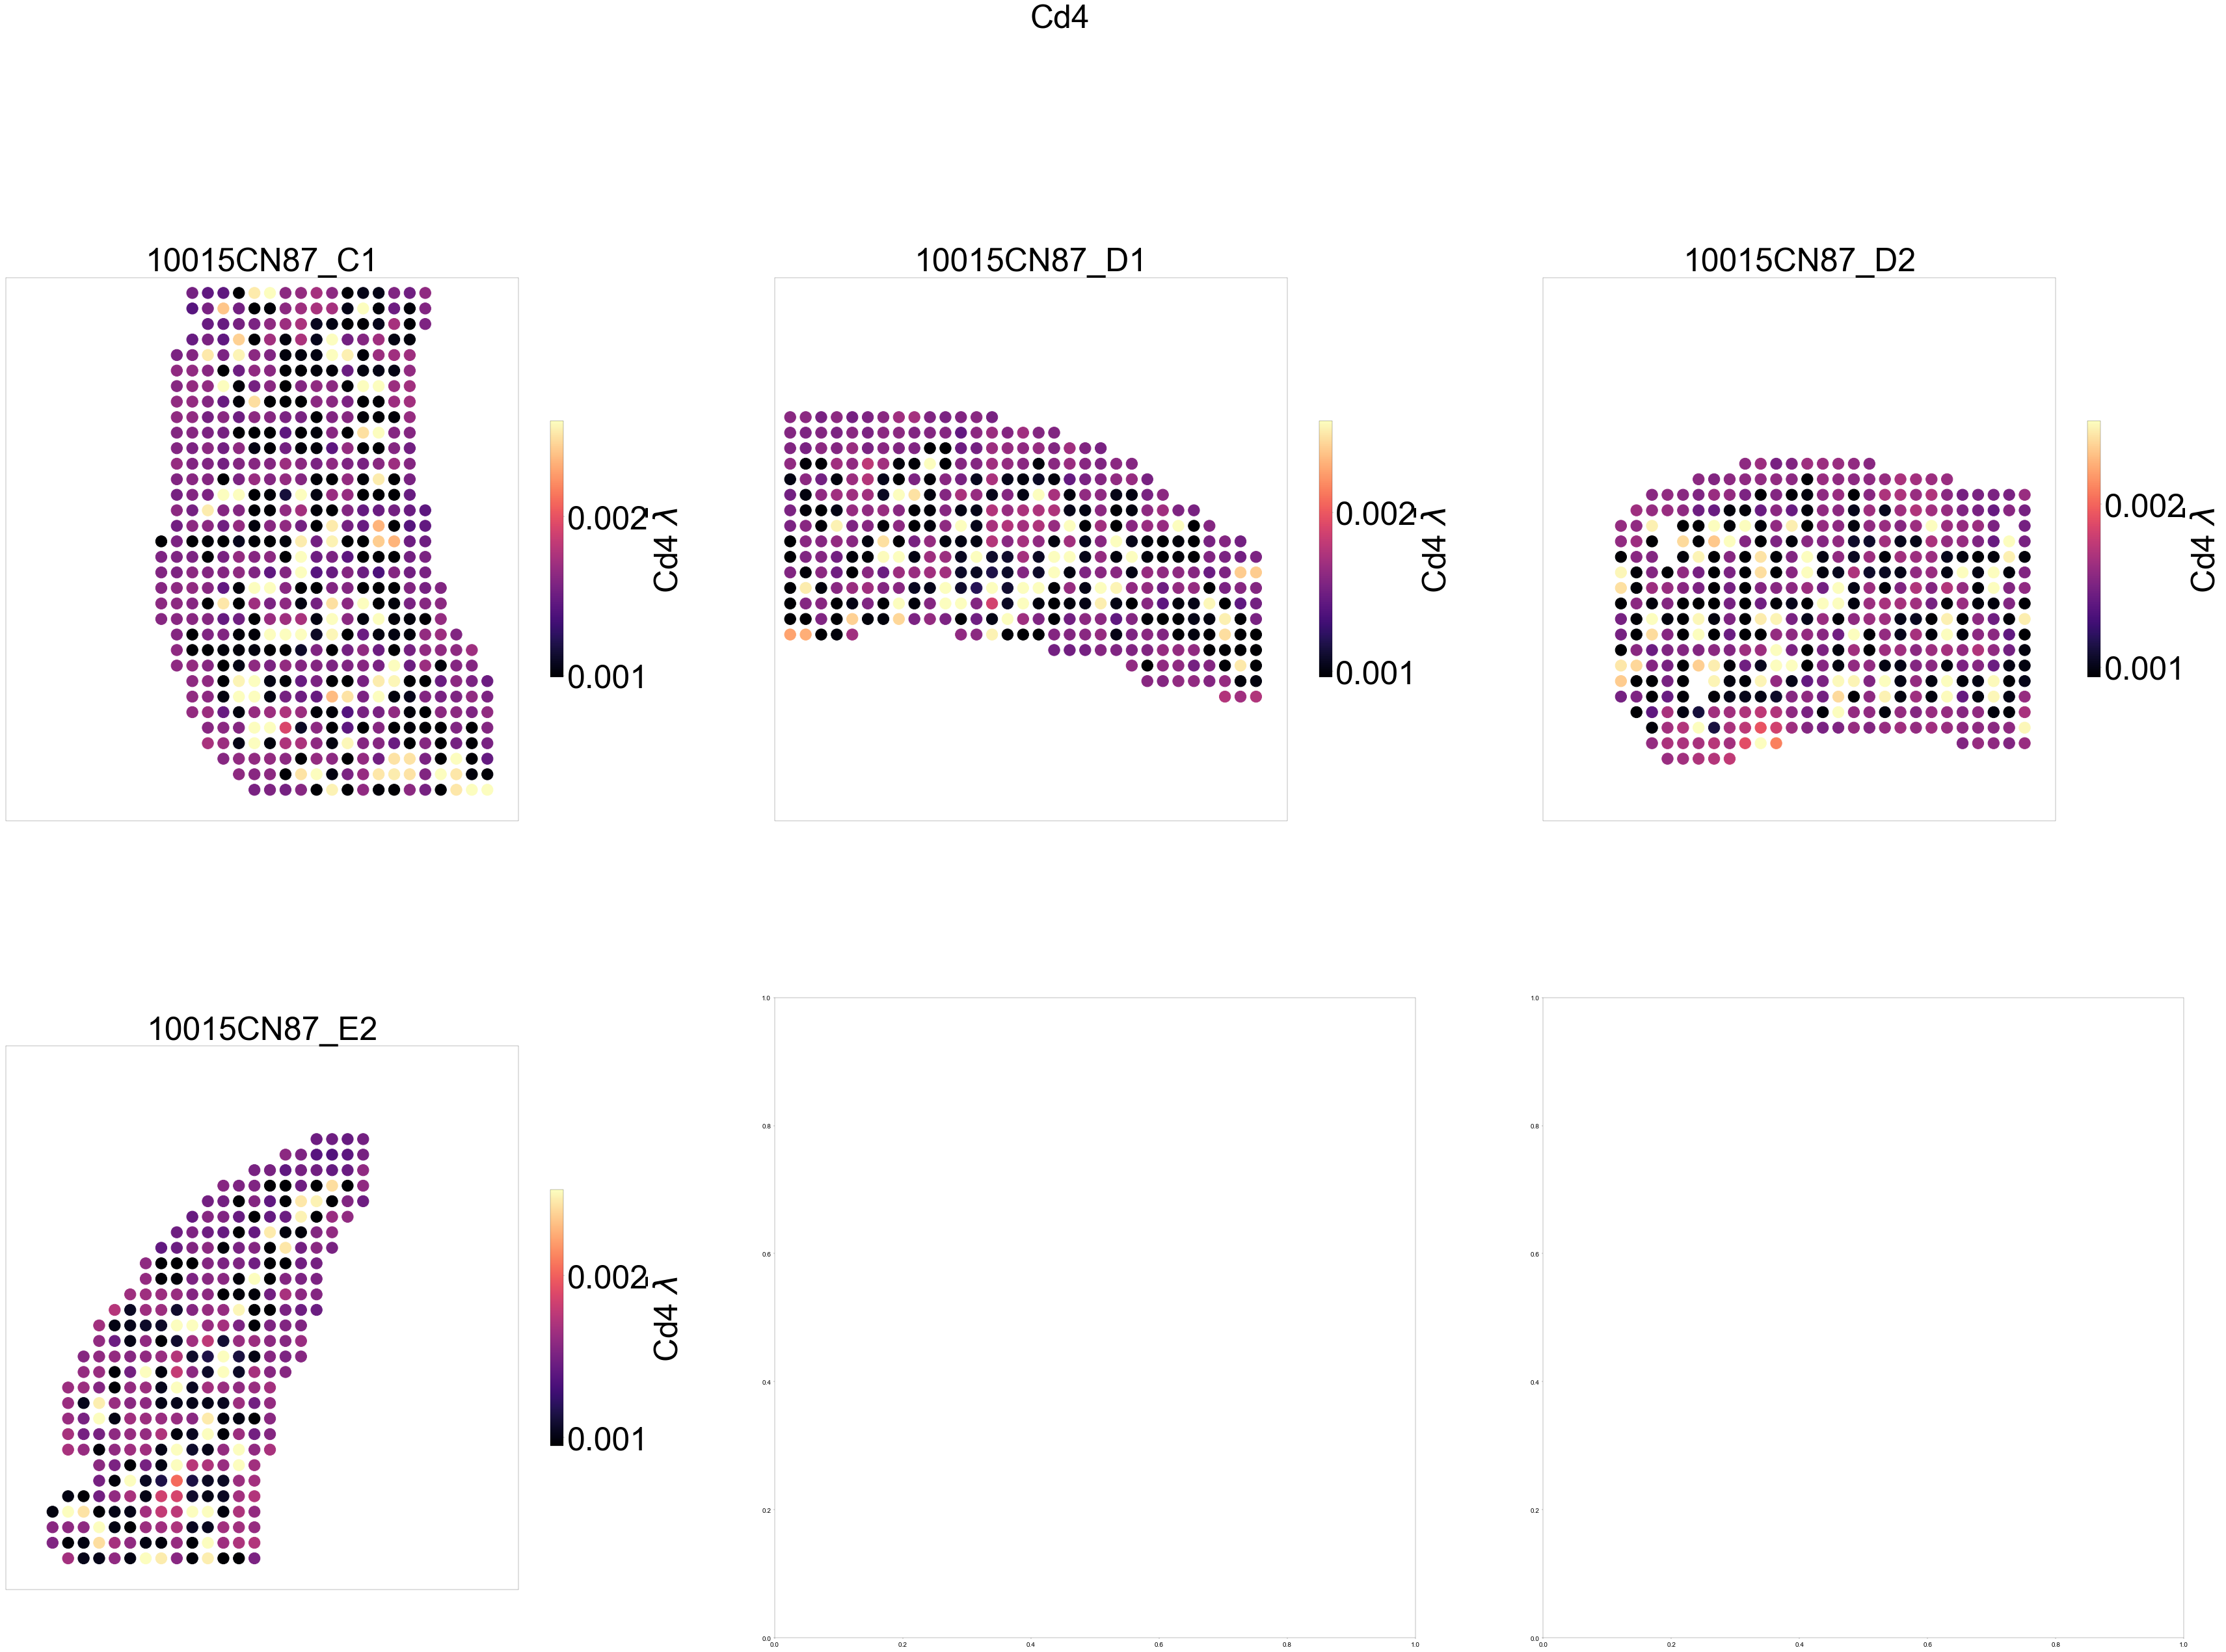

In [11]:
# initialize a figure
fig = matplotlib.pyplot.figure(figsize=(60, 60))
num_cols = 3
axes = []
count_files = numpy.array(list(lambda_posterior_means.columns.levels[0]))
for i in range(0,int((int(len(count_files)+2)/num_cols))):
    for j in range(0, num_cols):
        ax = plt.subplot2grid((int((len(count_files)+2)/num_cols+1), num_cols), (i, j))
        axes.append(ax) 

# get title
fig.suptitle(gene, fontsize=50)

# set percent cut offs for ploting
mins = [10,5,5,5,5,5]
maxs = [95,95,95,95,95,95]
# loop over the count files
for n, count_file in enumerate(count_files):
    
    ax = axes[n]

    coordinates = numpy.array([list(map(float,coordinate.split('_')))
                               for coordinate in list(lambda_posterior_means[count_file].columns)])
    
    x_coordinates = (coordinates[:,0]-1)
    y_coordinates = (coordinates[:,1]-1)
    
    # visualize the ST spots 
    s=300
    
    vmin = numpy.percentile(lambda_posterior_means[count_file].loc[gene].values,mins[n])
    vmax = numpy.percentile(lambda_posterior_means[count_file].loc[gene].values,maxs[n])
    
    cbmap = ax.scatter(x_coordinates,y_coordinates,
                       s=s,c=lambda_posterior_means[count_file].loc[gene],
                       cmap='magma',vmin=vmin,vmax=vmax,marker='o')
    
    ax.set_aspect('equal')
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_xlim(0, 33)
    ax.set_ylim(35,0)
    
    # put some information on the array in the title
    ax.set_title(count_file.split("/")[-1].split("_stdata_adjusted.tsv")[0], fontsize=50)
    
    cbar = matplotlib.pyplot.colorbar(cbmap,ax=ax,shrink=0.4)
    cbar.ax.tick_params(labelsize=50) 
    
    cbar.set_label(r'%s $\bar{\lambda}$'%(gene), fontsize=50)
    
fig.subplots_adjust(top=0.90)
#fig.savefig(gene+'_exons.pdf')

In [ ]:
len(count_files)